In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
data_dir = "/kaggle/input/fruit-recognition/train/train"

categories = os.listdir(data_dir)

In [13]:
data = []
labels = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    class_index = categories.index(category)  
    for img_name in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, img_name)

            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))
            data.append(img)
            labels.append(class_index)
        except Exception as e:
            print(f"Error loading image: {e}")


In [14]:
data = np.array(data)
labels = np.array(labels)

data = data / 255.0

labels = to_categorical(labels)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # عدد الفئات = عدد الفواكه
])



In [17]:
print(len(categories))

33


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)



In [20]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    validation_data=(X_test, y_test), 
                    epochs=2, 
                    verbose=1)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 149s 348ms/step - accuracy: 0.4213 - loss: 1.8878 - val_accuracy: 0.9617 - val_loss: 0.1293
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 148s 349ms/step - accuracy: 0.9005 - loss: 0.2808 - val_accuracy: 0.9620 - val_loss: 0.1017


In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.9620


In [22]:
model.save("fruit_recognition_model.h5")

In [23]:
def plot_sample_predictions(model, X_test, y_test, categories, num_samples=5):
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    for i in indices:
        img = X_test[i]
        label = np.argmax(y_test[i])
        pred = np.argmax(model.predict(np.expand_dims(img, axis=0)))
        plt.imshow(img)
        plt.title(f"True: {categories[label]}, Predicted: {categories[pred]}")
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


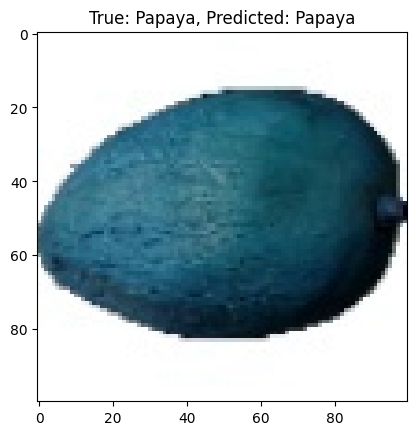

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


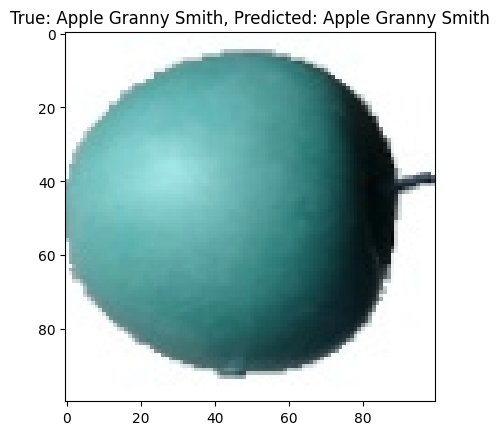

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


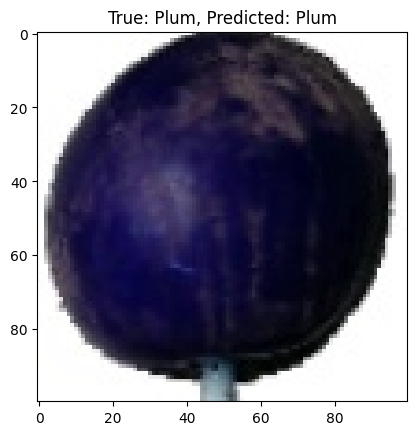

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


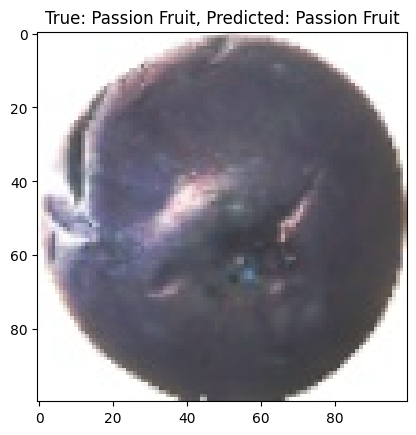

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


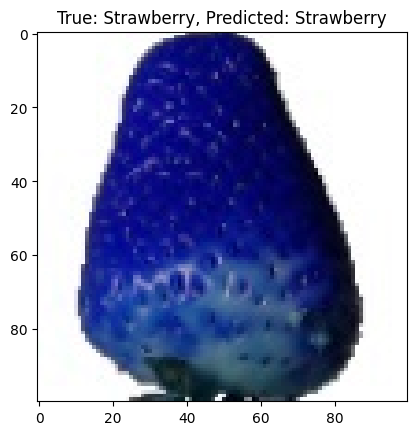

In [24]:
plot_sample_predictions(model, X_test, y_test, categories)